# Estimating Airbnb Listing Price in Seattle

<br> The objective of this project is estimating Airbnb listing prices using different features. </br>
<br> We study the predictors and highlight the ones that should be used for the evaluations. Specifically, we evaluate multicollinearity among listing features (predictors) and specify the statistically significant ones. </br>

<br> We apply the workflow and study the [listing](https://github.com/snejadi/Airbnb/blob/96a7b950543a45ac5b71bbf56e238a22275d3a92/Airbnb_data/Seattle/listings.csv) data for the city of Seattle.</br>

# Table of Content:
* [Estimating Airbnb listing price in Seattle](#Estimating-Airbnb-Listing-Price-in-Seattle)
* [The Data](#The-Data)
    * [Load Data](#Load-Data)
* [Data Preparation](#Data-Preparation)
    * [The Target - listing price](#The-Target---listing-price)
    * [The Features - predictors](#The-Features---predictors)
        * [Room Type](#Room-Type)
        * [Accommodates](#Accommodates)
        * [Bedrooms and Beds](#Bedrooms-and-Beds)
        * [Bathrooms](#Bathrooms)
        * [Multicollinearity among predictors - Part 1](#Multicollinearity-among-predictors---Part-1)
        * [Neighbourhood](#Neighbourhood)
        * [Property Type](#Property-Type)
        * [Reviews](#Reviews)
        * [Multicollinearity among predictors - Part 2](#Multicollinearity-among-predictors---Part-2)
        * [Availability](#Availability)
        * [Multicollinearity among predictors - Part 3](#Multicollinearity-among-predictors---Part-3)
        * [Bookable](#Bookable)
    * [Scaling and Transforming](#Scaling-and-Transforming)
* [Modeling](#Modeling)
    * [Linear Regression Analysis](#Linear-Regression-Analysis)
    * [Statistically Significant Features](#Statistically-Significant-Features)
    * [Estimating Price](#Estimating-Price)
* [Results](#Results)
* [Evaluation](#Evaluation)


<br> Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
from scipy import stats
from patsy import dmatrices, dmatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# The Data
<br> The listing.csv file has 74 columns
<br> Here I start working on specific columns listed below and define them in: col_list_listings
<br> In other words, I discard empty columns, url, names, etc.

In [2]:
col_list_listings = ['id', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text'
                     , 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability'
                     , 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews'
                     , 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy'
                     , 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication'
                     , 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']

## Load Data

In [3]:
city='Seattle'
data_fldr='../Airbnb_data/'

df=pd.read_csv(data_fldr + city +'/listings.csv', usecols=col_list_listings)

In [4]:
df.set_index('id');

In [5]:
print(df.shape)

(4686, 28)


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4686.0,3.359331e+07,1.710985e+07,2318.00,19386474.75,37381447.50,49910973.00,53904424.00
accommodates,4686.0,3.886470e+00,2.449298e+00,0.00,2.00,4.00,5.00,16.00
bedrooms,4061.0,1.692687e+00,1.019571e+00,1.00,1.00,1.00,2.00,8.00
beds,4579.0,2.069011e+00,1.447055e+00,1.00,1.00,2.00,3.00,16.00
minimum_nights,4686.0,1.377166e+01,2.060527e+01,1.00,2.00,3.00,30.00,365.00
maximum_nights,4686.0,5.603229e+02,5.210497e+02,1.00,31.00,365.00,1125.00,10000.00
availability_30,4686.0,1.234913e+01,1.044991e+01,0.00,1.00,11.00,21.00,30.00
availability_60,4686.0,3.135467e+01,2.102977e+01,0.00,12.00,35.00,49.00,60.00
availability_90,4686.0,5.229834e+01,3.075673e+01,0.00,25.00,61.00,78.00,90.00
availability_365,4686.0,1.940982e+02,1.241390e+02,0.00,79.00,179.00,321.00,365.00


# Data Preparation
<br> We start analysing the target and the features (predictors). We make necessary changes or modifications.

## The Target - listing price

Column name = price

In [7]:
print(df['price'].dtypes)
print(df['price'][0:10])

object
0    $333.00
1     $99.00
2     $62.00
3    $185.00
4    $145.00
5    $130.00
6    $143.00
7     $81.00
8     $67.00
9    $195.00
Name: price, dtype: object


In [8]:
# removing '$' and '.' from df.price and converting it to numeric values
df.price = df.price.str.replace('\$|,', '').astype('float64')

In [9]:
df.price.describe()

count    4686.000000
mean      158.667947
std       146.632730
min         0.000000
25%        86.000000
50%       125.000000
75%       188.750000
max      3887.000000
Name: price, dtype: float64

In [10]:
# droping invalid rows with listing price less than or equal to zero
df.drop(df[df.price<=0].index,inplace=True)
print(len(df))

4683


#### 
Very few listings (count=7) have a price greater than $1,000

In [11]:
df[df.price>1000].price.count()

7

<br> Data for the price column has a log-normal distribution
<br> I will use log10 and transform this column to convert it into a Gaussian distribution for modeling purposes
<br> note that I am using log-scale on the x_axis for the histogram (axes[1]) 
<br> I used it for conveying the message and showing the necessity for a log transformation

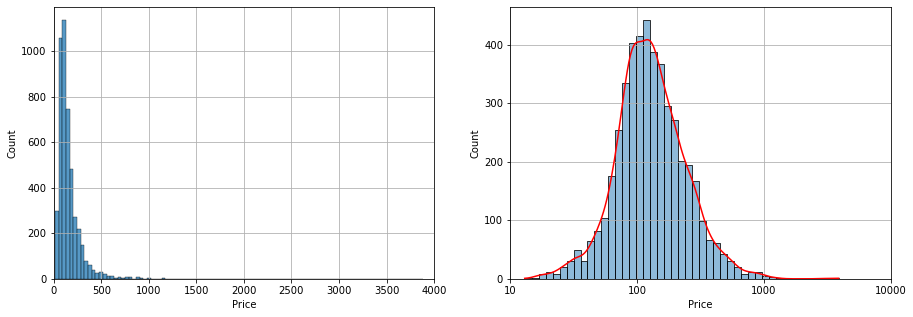

In [12]:
fig , axes = plt.subplots(1, 2, figsize=(15,5))

axes0 = sns.histplot(data=df, x=df['price'], bins=100, kde=False, ax=axes[0])
axes0.set_xlabel('Price')
axes0.grid(), axes0.set(xlim=(0, 4000));

axes1 = sns.histplot(data=df, x=np.log10(df['price']), bins=45, kde=True, ax=axes[1])
axes1.lines[0].set_color('red')
axes1.set_xlabel('Price')
axes1.set_xticks(range(1,5));
axes1.set_xticklabels([10,100,1000,10000]);
axes1.grid(), axes1.set(xlim=(1, 4));

## The Features - predictors
<br> Here we go through the important features 
<br> we further plot variations in Price vs. features

In [13]:
# defining a function to generate plots/subplots for different features

def count_box_plot(feature, xlabel=None, title=None, cutoff=0, start=1, step=1):
    '''
    This function plots:
        1) bar chart showing the total number of listings in each category
        2) box plot showing the distribution of price for each category
           I plot log10(price) and modify yaxis ticks to show actual price using semi_log_y_axis 
    
    Args:
        feature (string): data frame feature column, e.g., room_type, accommodates,...
        xlabel (string): x axis label for both barchart and boxplot
        title (string): subplot title for both barchart and boxplot
        cutoff (float): may range from 0 to df[feature].unique().max()
            use 0 to discard using a cutoff
            the purpose of using a cutoff is to lump very few high values in a single category     
    '''
    
    fig , axes = plt.subplots(1, 2, figsize=(15,5))

    # subplot 1) bar chart showing the total number of listings in each category
    axes0 = sns.countplot(data=df, x=df[feature], palette='Set1', ax=axes[0])
    axes[0].set_title(title)
    axes[0].set(xlabel=xlabel)
    axes[0].set_ylabel('Count')
    
    # adding the percentage of listings in each category
    for p in axes0.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axes0.annotate('{:.2f}%'.format(100.*y/len(df)), (x.mean(), y), 
                ha='center', va='bottom')
    
    # subplot 2) box plot showing the distribution of price for each category
    if ((df[feature].dtype=='O') | (cutoff==0)):
        axes[1] = sns.boxplot(data=df, x=df[feature], y=np.log10(df.price), palette='Set1', ax=axes[1])
    elif (cutoff<0) | (cutoff>np.nanmax(df[feature].unique())):
        print('cutoff value is not valid')
        print('cutoff value may range from zero to {}'.format(np.nanmax(df['beds'].unique())))
    elif (cutoff>0) & (cutoff<np.nanmax(df[feature].unique())):            
        axes[1] = sns.boxplot(data=df, x=df[feature].where(df[feature] <= cutoff, cutoff), y=np.log10(df.price)
                    , palette='Set1', ax=axes[1])
        axes[1].set_xticklabels(list(np.arange(start,cutoff,step)) + [f'{cutoff}+'])
                       
    axes[1].set_title(title)
    axes[1].set(xlabel=xlabel)
    axes[1].set_ylabel('Price')
    
    # range of y_axis (price) data
    y_min=math.floor(np.log10(df.price).min())
    y_max=math.ceil(np.log10(df.price).max())
    y_range=np.array(range(y_min,y_max+1))
    # modifying y-axis tick labels to show Price on a log10 scale    
    axes[1].set_yticks(y_range)
    axes[1].set_yticklabels(pow(10,y_range))
    axes[1].grid(axis='y')

### Room Type
column name = room_type

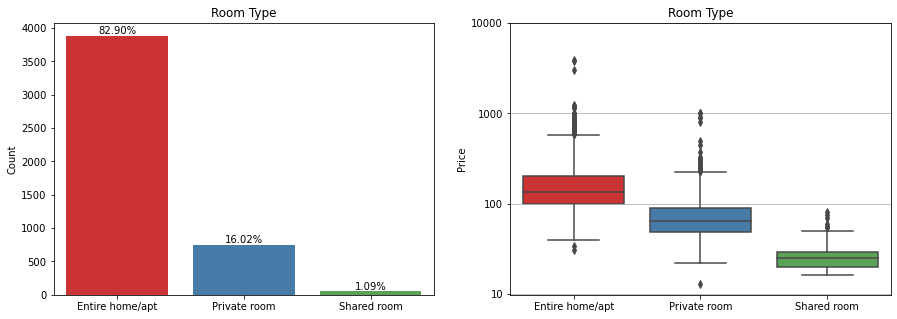

In [14]:
count_box_plot(feature='room_type', title='Room Type')

### Accommodates
column name = accommodates

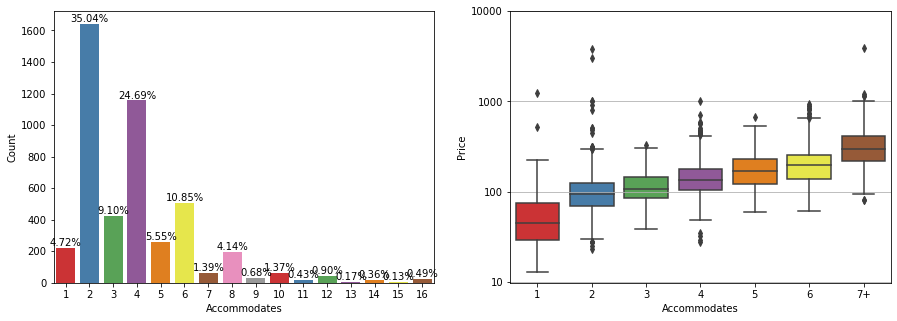

In [15]:
count_box_plot(feature='accommodates', xlabel='Accommodates', cutoff=7)

<br> As we will observe later in the study, <I>accommodates</I> is one of the main features in the dataset
<br> In some other data sets the accommodation is zero, and it is necessary to drop the listings where accommodates==0

In [16]:
df.drop(df[df.accommodates==0].index, inplace=True)
print(len(df))

4683


### Bedrooms and Beds
<br> Column name = bedrooms
<br> Column name = beds

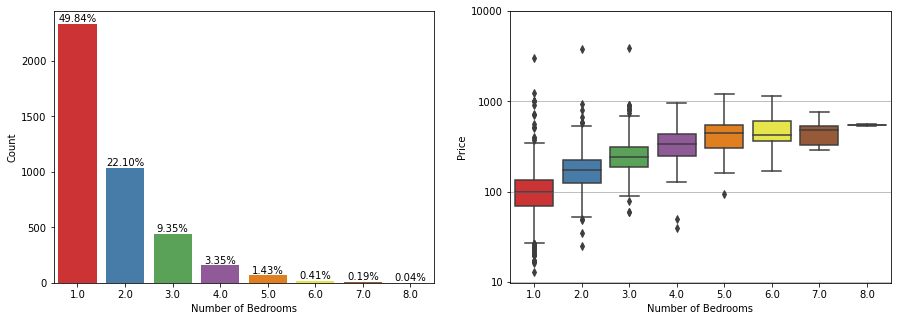

In [17]:
count_box_plot(feature='bedrooms', xlabel='Number of Bedrooms')

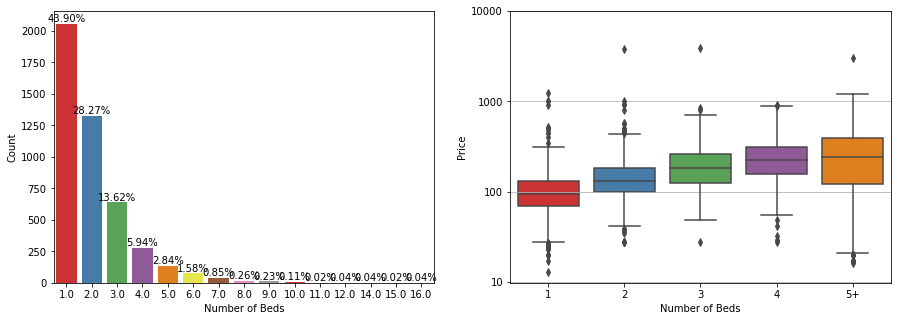

In [18]:
count_box_plot(feature='beds', xlabel='Number of Beds', cutoff=5)

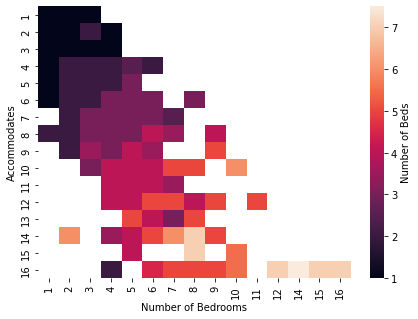

In [19]:
# using heat map to reveal the inherent relationship between <i>Accommodates</i>, <i>Bedrooms</i>, and <i>Beds</i>
heatmap_data = df[['accommodates', 'beds', 'bedrooms']]
data_pivoted = pd.pivot_table(data=df, values=['bedrooms'], index=['accommodates'], columns=['beds'], aggfunc='median')

fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(data_pivoted, cbar_kws={'label': 'Number of Beds'})
axes.set_ylabel('Accommodates');
axes.set_xlabel('Number of Bedrooms');
axes.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]);

In [20]:
print('Number of missing values in beds: ', df.beds.isna().sum())
print('Number of missing values in bedrooms: ', df.bedrooms.isna().sum())

Number of missing values in beds:  104
Number of missing values in bedrooms:  622


In [21]:
# filling missing values in: beds and bedrooms
df['beds'].fillna(df.groupby(['accommodates','room_type'])['beds'].transform('mean').transform('round'), inplace=True)
df['beds'].fillna((df['accommodates']/2).apply(np.ceil), inplace=True)
df['bedrooms'].fillna(df.groupby(['beds','room_type'])['bedrooms'].transform('mean').transform('round'), inplace=True)
df['bedrooms'].fillna((df['accommodates']/2).apply(np.ceil), inplace=True)

### Bathrooms
<br> Column name = bathroom_text

<br> bathroom_text has lots of unique items
<br> will convert it into two columns: 1) if it is shared or private, and 2) the number of bathrooms for the property

In [22]:
df.bathrooms_text.unique()

array(['2.5 baths', '1 bath', '3 shared baths', '1 private bath',
       '1.5 baths', '4 shared baths', '2 baths', '1 shared bath',
       '3 baths', '1.5 shared baths', '3.5 baths', 'Shared half-bath',
       '2 shared baths', '4 baths', 'Half-bath', '3.5 shared baths',
       '6 baths', '4.5 baths', '0 baths', '0 shared baths',
       'Private half-bath', '16 shared baths', nan, '2.5 shared baths'],
      dtype=object)

In [23]:
df.bathrooms_text.isna().sum()

1

In [24]:
print('Number of listings with a shared bath: ', np.nansum(df.bathrooms_text.str.contains('shared')))

Number of listings with a shared bath:  458


In [25]:
# creating a new column, 1: if bath is shared, 0: not shared or nan
df['bath_is_shared'] = pd.get_dummies(df.bathrooms_text.str.contains('shared'), drop_first=True)
# I use 0 for nan for simplicity, one could have used df.room_type to improve the estimations
df['bath_is_shared'].fillna(0, inplace=True)

In [26]:
sum(df['bath_is_shared'])

458

In [27]:
# extracting the numerical values from bathrooms_text
df['bathroom_numbers'] = df.bathrooms_text.str.extract('([0-9][,.]*[0-9]*)')

# extracting 'half' from bathrooms_text and assigning 0.5
df['bathroom_numbers'][df.bathrooms_text.str.contains('half', na=False, regex=False)]=0.5

df['bathroom_numbers'] = pd.to_numeric(df['bathroom_numbers'])
df.drop(columns=['bathrooms_text'], inplace=True)

<br> filling possibble missing values with 1 (a property should have a bathroom)

In [28]:
df['bathroom_numbers'].fillna(1, inplace=True)

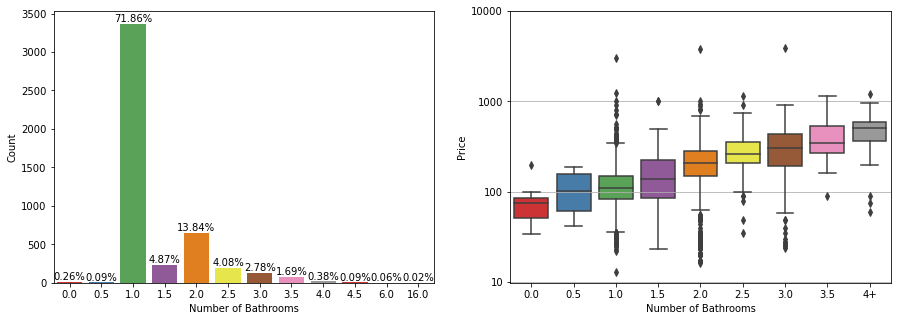

In [29]:
count_box_plot(feature='bathroom_numbers', xlabel='Number of Bathrooms', cutoff=4, start=0, step=0.5)

In [30]:
# one listing has 16 shared baths, which is an outlier
print(len(df[df.bathroom_numbers==16]))
df.drop(df[df.bathroom_numbers==16].index, inplace=True)

1


### Multicollinearity among predictors - Part 1
* Accommmodates
* Bedrooms
* Beds
* Bathrooms

In [31]:
def vif_ols_analysis(df):
    '''
    This function implemets: 
        1) MinMaxScaler and transforms the data.
        2) Ordinary Least Square (OLS) method for linear regression analysis.
            We use the calculated p-values to highlight significant features
        3) Variance Inflation Factor (vif) to evaluate multicolinearity among predictors.
    Args:
        It takes a dataframe as an input. it uses the price column as the target.
        Other columns will be used as the predictors.
    Returns:
        results for OLS (OLS results table) and VIF (pd dataframe)
                    
    '''
    X = df.drop(columns=['price'])
    y = df['price']
    
    scaler = MinMaxScaler()
    scaler.fit_transform(X, y)
    
    X = sm.add_constant(X)
    est = sm.OLS(y, X)
    ols_results = est.fit()
    
    vif_results = pd.DataFrame()
    vif_results['vif_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    
    vif_results.set_index(X.columns, inplace=True)
    
    return ols_results, vif_results

def vif_table(vif_results, limit=5):
    '''
    This function modifies the vif_results style to improve visualization
    Args:
        vif_results: is a pandas dataframe returned from vif_ols_analysis
        limit: integer, generally when VIFs are greater than 10, it suggests 
                        that multicollinearity is a problem in the model.
                        a value of 5 is also suggested.
    '''
    vif_results.drop(index=['const'], axis=0, inplace=True)
    v = vif_results.style.highlight_between(subset=['vif_factor'], left=limit, color='#d65f5f')\
                         .highlight_between(subset=['vif_factor'], left=0, right=limit, color='#5fba7d')

    return v

def ols_table(ols_results, limit=0.05):
    '''
    This function selects specific columns of the OLS results and modifies the output style
    to improve visualization
    '''
    results_df = pd.DataFrame(data=list(zip(ols_results.params.values
                                            , ols_results.bse.values
                                            , ols_results.tvalues.values
                                            , ols_results.pvalues.values
                                            , ols_results.conf_int().values[:,0]
                                            , ols_results.conf_int().values[:,1])))
    results_df.index=ols_results.params.index
    results_df.columns=['coef', 'std_err', 't_value', 'p_value', 'conf_int_0.25', 'conf_int_0.75']
    results_df.drop(index=['const'], axis=0, inplace=True)
    
    s = results_df.style\
                    .highlight_between(subset=['p_value'], left=0, right=limit, color='#5fba7d')\
                    .highlight_between(subset=['p_value'], left=limit, right=1, color='#d65f5f')\
                    .bar(subset=['coef'], align='zero', color=['#d65f5f', '#5fba7d'])
    
    return s

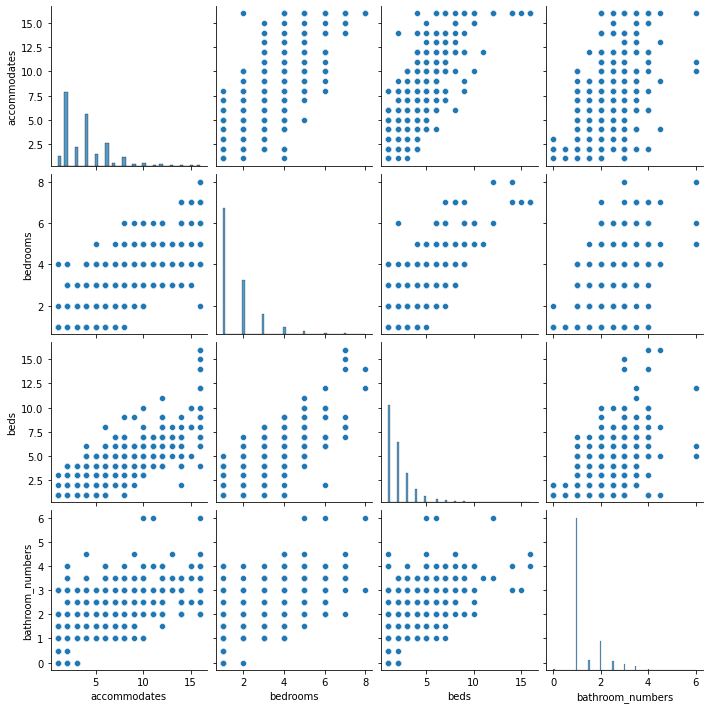

In [32]:
# seaborn pairplot to show/study the multicollinearity between selected features
sns.pairplot(df[['accommodates'
                 , 'bedrooms'
                 , 'beds'
                 , 'bathroom_numbers'
                ]]);

In [33]:
ols_results, vif_results = vif_ols_analysis(df[['price'
                                                , 'accommodates'
                                                , 'beds'
                                                , 'bedrooms'
                                                , 'bathroom_numbers'
                                               ]])

In [34]:
vif_table(vif_results)

,vif_factor
accommodates,5.042206
beds,5.243151
bedrooms,4.954081
bathroom_numbers,2.015128


In [35]:
ols_table(ols_results)

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
accommodates,13.241522,1.626343,8.141898,0.000000,10.053122,16.429922
beds,-1.626101,2.819920,-0.576648,0.564205,-7.154473,3.902271
bedrooms,33.205193,4.047078,8.204733,0.000000,25.271013,41.139373
bathroom_numbers,44.464644,3.932635,11.306578,0.000000,36.754826,52.174462


In [36]:
# removing beds will mitigate collinearity
ols_results, vif_results = vif_ols_analysis(df[['price', 
                                                'accommodates', 
#                                                 'beds', 
                                                'bedrooms', 
                                                'bathroom_numbers']])

In [37]:
vif_table(vif_results)

,vif_factor
accommodates,3.463892
bedrooms,4.214475
bathroom_numbers,2.013744


In [38]:
ols_table(ols_results)

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
accommodates,12.716824,1.347886,9.434644,0.000000,10.074332,15.359316
bedrooms,32.303475,3.732508,8.654630,0.000000,24.986000,39.620949
bathroom_numbers,44.405226,3.931004,11.296153,0.000000,36.698605,52.111847


In [39]:
# we drop the beds column to mitigate the collinearity as shown above 
df.drop(columns='beds', inplace=True)
# we use get_dummies to convert room_type categorical variable into indicator variables.
df = pd.get_dummies(df, columns=['room_type'], prefix=['room_type'], prefix_sep='_',drop_first=True)

### Neighbourhood

In [40]:
print('list of neighbourhoods:')
print(df['neighbourhood_cleansed'].unique())
print('\n')
print('total number of unique neighbourhoods:')
print(len(df['neighbourhood_cleansed'].unique()))
print('\n')
print('number of missing values in neighbourhoods:')
print(df['neighbourhood_cleansed'].isna().sum())

list of neighbourhoods:
['Madrona' 'Wallingford' 'Georgetown' 'Fairmount Park' 'Whittier Heights'
 'Loyal Heights' 'Eastlake' 'Fremont' 'Alki' 'Green Lake'
 'Harrison/Denny-Blaine' 'Portage Bay' 'Lower Queen Anne' 'Phinney Ridge'
 'Crown Hill' 'Belltown' 'Lawton Park' 'Mid-Beacon Hill'
 'North Queen Anne' 'West Queen Anne' 'First Hill' 'Broadway'
 'North Admiral' 'Arbor Heights' 'International District'
 'North Beacon Hill' 'Greenwood' 'Cedar Park' 'Columbia City'
 'Mount Baker' 'Mann' 'Genesee' 'Central Business District' 'Ravenna'
 'University District' 'South Delridge' 'Atlantic' 'Broadview'
 'Maple Leaf' 'East Queen Anne' 'Pioneer Square' 'Highland Park'
 'West Woodland' 'Haller Lake' 'Madison Park' 'Fauntleroy' 'Westlake'
 'Matthews Beach' 'Minor' 'Leschi' 'Sunset Hill' 'Adams'
 'North Beach/Blue Ridge' 'Briarcliff' 'North Delridge' 'Bryant'
 'Seward Park' 'Bitter Lake' 'Riverview' 'Brighton' 'Interbay'
 'View Ridge' 'Stevens' 'Pike-Market' 'High Point' 'Yesler Terrace'
 'Harbor I

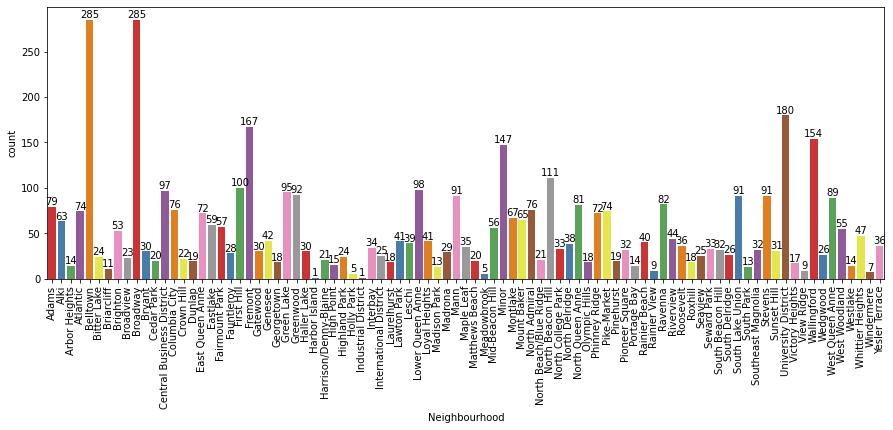

In [41]:
plt.figure(figsize=(15,5))

# use order to sort bars according to the average neghbourhood price
order = df.groupby(['neighbourhood_cleansed'])['price'].mean().index 
axes0 = sns.countplot(data=df, x=df.neighbourhood_cleansed, palette='Set1', order=order)
# adding the number of listings in each neighbourhood category
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)
axes0.set_xticklabels(axes0.get_xticklabels(),rotation = 90);
axes0.set_xlabel('Neighbourhood');

In [42]:
# creating a list of neighbourhoods where total number of listings are less than 5
# due to few listings in these neighbourhoods (some with 1 listing) the results may not be accurate
# these data will not be discarded, but a single dummy variable is used to represent these neighbourhoods
temp_df = pd.DataFrame(df.neighbourhood_cleansed.value_counts())
non_sig_neighbourhood = temp_df[temp_df.neighbourhood_cleansed<5].index
# it is note worthy that we could use OLS p-value to filter all non-significant neighbourhoods
# here we help removing some neighbourhoods with very few listings in advance

In [43]:
#Here we only use neighbourhoods with more than 5 listings, note that drop first is False to consider other neighbourhoods 
df = pd.get_dummies(df.replace(non_sig_neighbourhood, None), columns=['neighbourhood_cleansed']
                    , prefix=['neighbourhood'], prefix_sep='_',drop_first=False)

In [44]:
neighbourhood_columns = df.columns[df.columns.str.startswith('neighbourhood')]

In [45]:
ols_results, vif_results = vif_ols_analysis(df[['price'] + neighbourhood_columns.to_list()])

In [46]:
vif_table(vif_results)

,vif_factor
neighbourhood_Adams,39.816638
neighbourhood_Alki,32.062687
neighbourhood_Arbor Heights,7.976079
neighbourhood_Atlantic,37.399402
neighbourhood_Belltown,134.764951
neighbourhood_Bitter Lake,12.933362
neighbourhood_Briarcliff,6.484729
neighbourhood_Brighton,27.188701
neighbourhood_Broadview,12.438595
neighbourhood_Broadway,134.764951


In [47]:
ols_table(ols_results)

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
neighbourhood_Adams,28.639241,102.714508,0.278824,0.780393,-172.730550,230.009031
neighbourhood_Alki,53.865079,103.036057,0.522779,0.601153,-148.135101,255.865260
neighbourhood_Arbor Heights,15.357143,108.442320,0.141616,0.887390,-197.241911,227.956197
neighbourhood_Atlantic,16.689189,102.800153,0.162346,0.871041,-184.848507,218.226886
neighbourhood_Belltown,18.194737,101.793804,0.178741,0.858149,-181.370032,217.759505
neighbourhood_Bitter Lake,-35.708333,105.580540,-0.338209,0.735221,-242.696924,171.280257
neighbourhood_Briarcliff,92.045455,110.275278,0.834688,0.403937,-124.147077,308.237986
neighbourhood_Brighton,-23.481132,103.334713,-0.227234,0.820252,-226.066822,179.104557
neighbourhood_Broadview,81.717391,105.756949,0.772691,0.439745,-125.617045,289.051828
neighbourhood_Broadway,-3.100000,101.793804,-0.030454,0.975707,-202.664768,196.464768


In [48]:
df.drop(columns=neighbourhood_columns, inplace=True);

### Property Type
<br> Column name = property_type

In [49]:
print(df['property_type'].unique())
print(df['property_type'].isna().sum())

['Entire residential home' 'Entire guesthouse'
 'Private room in rental unit' 'Entire guest suite' 'Entire rental unit'
 'Private room in residential home' 'Entire condominium (condo)'
 'Private room in cottage' 'Private room in loft'
 'Private room in guesthouse' 'Private room' 'Private room in bungalow'
 'Private room in townhouse' 'Boat' 'Entire cottage' 'Entire townhouse'
 'Private room in guest suite' 'Private room in boat' 'Entire bungalow'
 'Private room in condominium (condo)' 'Entire loft'
 'Shared room in townhouse' 'Shared room' 'Private room in treehouse'
 'Entire villa' 'Entire cabin' 'Tent' 'Camper/RV' 'Tiny house' 'Houseboat'
 'Entire serviced apartment' 'Shared room in rental unit'
 'Room in boutique hotel' 'Shared room in loft'
 'Private room in earth house' 'Private room in tiny house'
 'Private room in serviced apartment' 'Private room in villa'
 'Private room in bed and breakfast' 'Room in aparthotel'
 'Private room in cabin' 'Shared room in residential home' 'Farm 

<br> property_type has lots of unique elements and room_type is descriptive enough.
<br> drop it for now
<br> property_type column may be useful for analysing outliers, etc.

In [50]:
df.drop(columns='property_type', inplace=True)

### Reviews
<br> Column name = 
<br>&emsp;                    'number_of_reviews'
<br>&emsp;                    'number_of_reviews_ltm'
<br>&emsp;                    'number_of_reviews_l30d'
<br>
<br>&emsp;                    'review_scores_rating'
<br>&emsp;                    'review_scores_accuracy'
<br>&emsp;                    'review_scores_cleanliness'
<br>&emsp;                    'review_scores_checkin'
<br>&emsp;                    'review_scores_communication'
<br>&emsp;                    'review_scores_location'
<br>&emsp;                    'review_scores_value'

In [51]:
n_review_cols = ['number_of_reviews'
                 , 'number_of_reviews_ltm'
                 , 'number_of_reviews_l30d'
                 , 'reviews_per_month'
                ]

review_score_cols = ['review_scores_rating'
                     , 'review_scores_accuracy'
                     , 'review_scores_cleanliness'
                     , 'review_scores_checkin'
                     , 'review_scores_communication'
                     , 'review_scores_location'
                     , 'review_scores_value'
                    ]

In [52]:
print(np.sum(np.isnan(df[review_score_cols])))
print('\n')
print(np.sum(df[review_score_cols]==0))

review_scores_rating           722
review_scores_accuracy         728
review_scores_cleanliness      728
review_scores_checkin          728
review_scores_communication    728
review_scores_location         728
review_scores_value            728
dtype: int64


review_scores_rating           6
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64


In [53]:
# if the number_of_reviews is zero the columns listed below in review_cols are NaN
# fillna with 0 in review_cols, and MUST use/keep number_of_reviews to describe zero review_scores_*
for col in review_score_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
# data['Native Country'].fillna(data['Native Country'].mode()[0], inplace=True)
    
df['reviews_per_month'].fillna(0, inplace=True)

### Multicollinearity among predictors - Part 2
* number_of_reviews
* number_of_reviews_ltm
* number_of_reviews_l30d
* reviews_per_month
<br></br>
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin
* review_scores_communication
* review_scores_location
* review_scores_value'

In [54]:
scaler = MinMaxScaler() # using sklearn minmaxscaler to transform the specified features by scaling them between zero and one.

scaler.fit(df[n_review_cols]) # features related to the number of reviews
scaled_n_review_features = scaler.transform(df[n_review_cols])

scaler.fit(df[review_score_cols]) # features related to review scores
scaled_review_score_features = scaler.transform(df[review_score_cols])

<br> The following graphs show the calculated pairwise correlation of specified features
<br> The Pearson method is used in this case
<br>
<br> The subplot on the right shows that some review scores columns are correlated,
<br> whereas, the correlation coefficient between the columns related to the number of reviews (left subplot) are not highly correlated (compared to review scores).

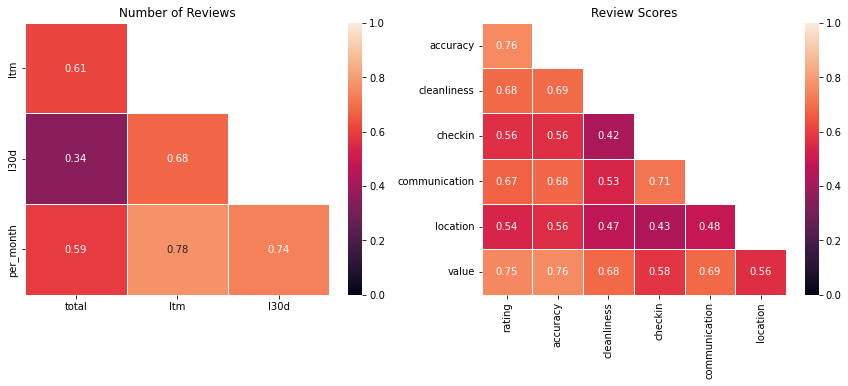

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

n_review_corr = pd.DataFrame(scaled_n_review_features).corr()
labels=['total', 'ltm', 'l30d', 'per_month']

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(n_review_corr, dtype=bool))
# adjust mask and df
mask = mask[1:, :-1]
n_review_corr = n_review_corr.iloc[1:,:-1].copy()

sns.heatmap(n_review_corr, mask=mask, annot=True, linewidths=.5, vmin=0, vmax=1
            , xticklabels=labels[:-1], yticklabels=labels[1:], ax=axes[0])
axes[0].title.set_text('Number of Reviews')

review_score_corr = pd.DataFrame(scaled_review_score_features).corr()
labels=[]
for txt in review_score_cols:
    labels.append(txt.replace('review_scores_', ''))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(review_score_corr, dtype=bool))
mask = mask[1:, :-1]
review_score_corr = review_score_corr.iloc[1:,:-1].copy()
sns.heatmap(review_score_corr,  mask=mask, annot=True, linewidths=.5, vmin=0, vmax=1
            , xticklabels=labels[:-1], yticklabels=labels[1:], ax=axes[1])
axes[1].title.set_text('Review Scores')

In [56]:
# we further study the collinearity among the features using vif and OLS as discussed before.
ols_results, vif_results = vif_ols_analysis(df[['price'
                                                , 'number_of_reviews'
                                                , 'number_of_reviews_ltm'
                                                , 'number_of_reviews_l30d'
                                                , 'reviews_per_month'
                                               ]])

In [57]:
# the vif results show that the features related to the number of reviews are not explained by others
vif_table(vif_results)

,vif_factor
number_of_reviews,1.819525
number_of_reviews_ltm,3.086465
number_of_reviews_l30d,2.515259
reviews_per_month,3.547907


In [58]:
# the least square analysis show negative correlation between the target (listing price)
# and most of the predictors related to the number of reviews
# which is not what we expected!
ols_table(ols_results)

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
number_of_reviews,-0.096208,0.029655,-3.244191,0.001186,-0.154347,-0.038069
number_of_reviews_ltm,0.182967,0.183695,0.996038,0.319283,-0.177161,0.543096
number_of_reviews_l30d,-0.330673,1.838415,-0.179869,0.857263,-3.934833,3.273486
reviews_per_month,-7.044601,2.079291,-3.387983,0.000710,-11.120990,-2.968211


In [59]:
# we exclude columns related to the number of reviews from the study due to poor/unreasonable correlations
df.drop(columns=n_review_cols, inplace=True)

In [60]:
# the previous graphs shows very high correlation among the columns for review scores
# we further use vif to show that these features are explained by one another
ols_results, vif_results = vif_ols_analysis(df[['price'
                                                , 'review_scores_rating'
                                                , 'review_scores_accuracy'
                                                , 'review_scores_cleanliness'
                                                , 'review_scores_checkin'
                                                , 'review_scores_communication'
                                                , 'review_scores_location'
                                                , 'review_scores_value'
                                               ]])

In [61]:
vif_table(vif_results)

,vif_factor
review_scores_rating,3.193006
review_scores_accuracy,3.343913
review_scores_cleanliness,2.297470
review_scores_checkin,2.123898
review_scores_communication,2.888118
review_scores_location,1.590481
review_scores_value,3.335728


In [62]:
ols_table(ols_results)

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
review_scores_rating,32.835166,9.580328,3.427353,0.000615,14.053204,51.617128
review_scores_accuracy,-13.715697,12.064881,-1.136828,0.255668,-37.368553,9.937160
review_scores_cleanliness,30.103681,9.330161,3.226491,0.001262,11.812165,48.395196
review_scores_checkin,2.182436,10.809594,0.201898,0.840005,-19.009467,23.374339
review_scores_communication,6.047465,12.060219,0.501439,0.616086,-17.596254,29.691183
review_scores_location,50.472423,11.707793,4.311011,0.000017,27.519627,73.425220
review_scores_value,-42.526552,10.557335,-4.028152,0.000057,-63.223909,-21.829195


In [63]:
ols_results, vif_results = vif_ols_analysis(df[['price', 
                                                'review_scores_rating', 
#                                                 'review_scores_accuracy', 
                                                'review_scores_cleanliness', 
#                                                 'review_scores_checkin', 
#                                                 'review_scores_communication', 
                                                'review_scores_location', 
                                                'review_scores_value'
                                               ]])

In [64]:
ols_table(ols_results)

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
review_scores_rating,31.271399,8.829365,3.541750,0.000401,13.961683,48.581115
review_scores_cleanliness,27.484650,9.044868,3.038701,0.002389,9.752446,45.216854
review_scores_location,49.285077,11.492672,4.288392,0.000018,26.754024,71.816131
review_scores_value,-43.931364,9.659193,-4.548140,0.000006,-62.867936,-24.994793


In [65]:
df.drop(columns=['review_scores_accuracy'
                 , 'review_scores_checkin'
                 , 'review_scores_communication'
                ]
        , inplace=True)

### Availability
<br> Column name = has_availability

In [66]:
print(df['has_availability'].unique())
print(df['has_availability'].isna().sum())

['t']
0


In [67]:
# All the listings in the data set have has_availability=t, we drop this column
df.drop(columns='has_availability', inplace=True)

### Multicollinearity among predictors - Part 3
* availability_30
* availability_60
* availability_90
* availability_365

In [68]:
ols_results, vif_results = vif_ols_analysis(df[['price'
                                                , 'availability_30'
                                                , 'availability_60'
                                                , 'availability_90'
                                                , 'availability_365'
                                               ]])

In [69]:
vif_table(vif_results)

,vif_factor
availability_30,6.897990
availability_60,30.378130
availability_90,17.935534
availability_365,1.405888


In [70]:
ols_table(ols_results)

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
availability_30,-0.348996,0.536317,-0.650728,0.515254,-1.400430,0.702437
availability_60,1.135706,0.559424,2.030132,0.042400,0.038970,2.232441
availability_90,-0.349540,0.293967,-1.189046,0.234482,-0.925853,0.226773
availability_365,0.055253,0.020390,2.709806,0.006757,0.015279,0.095227


In [71]:
# keep short term (30) and long term (365) availability and drop mid-range availability_60 and 90
df.drop(columns=['availability_60'
                 , 'availability_90'
                ]
        , inplace=True)

### Bookable
<br> Column name = instant_bookable

In [72]:
print(df['instant_bookable'].unique())
print(df['instant_bookable'].isna().sum())

['t' 'f']
0


In [73]:
# we use get_dummies to convertinstant_bookable categorical variable into indicator variables.
df = pd.get_dummies(df, columns=['instant_bookable'], prefix=['bookable'], prefix_sep='_',drop_first=True)

## Scaling and Transforming

In [74]:
df.price = np.log10(df.price)

In [75]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_feat = pd.DataFrame(scaled_features, columns=df.columns)

In [76]:
col_features = df.columns.drop('price') # predictor columns
col_target = ['price'] # target column

scaler_feat = MinMaxScaler()
scaler_feat.fit(df[col_features])
scaled_features = scaler_feat.transform(df[col_features])
df_feat = pd.DataFrame(scaled_features, columns=col_features)

scaler_target = MinMaxScaler()
scaler_target.fit(df[col_target])
scaled_target = scaler_target.transform(df[col_target])
df_target = pd.DataFrame(scaled_target, columns=col_target)

X = df_feat
y = df_target

# Modeling

## Linear Regression Analysis

<br> In this section, I use Linear Regression Analysis (Ordinary Least Squares, OLS)
<br> The calculated p-values and coefficients point out the statistically significant relationships

In [77]:
X = sm.add_constant(X)
est = sm.OLS(y, X)
results = est.fit()
# print(results.summary())

<br> Creating a pandas DataFrame using Ordinary Least Squares (OLS) results

In [78]:
results_df = pd.DataFrame(data=list(zip(results.params.values,results.bse.values, results.tvalues.values
                                        , results.pvalues.values, results.conf_int().values[:,0]
                                        , results.conf_int().values[:,1])))
results_df.index=results.params.index
results_df.columns=['coef', 'std_err', 't_value', 'p_value', 'conf_int_0.25', 'conf_int_0.75']
results_df.drop(index=['const', 'id'], axis=0, inplace=True)

<br> highlighting statistically significant features using p_value<0.05

In [79]:
results_df.sort_values(by=['coef'], key=abs, ascending=False, inplace=True)
results_df.style.highlight_between(subset=['p_value'], left=0, right=0.05, color='#5fba7d')\
                .highlight_between(subset=['p_value'], left=0.05, right=1, color='#d65f5f')\
                .bar(subset=['coef'], align='zero', color=['#d65f5f', '#5fba7d'])

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
bathroom_numbers,0.185844,0.014128,13.154267,0.000000,0.158147,0.213542
room_type_Shared room,-0.180319,0.011325,-15.922764,0.000000,-0.202521,-0.158118
review_scores_location,0.177782,0.022109,8.041275,0.000000,0.134439,0.221125
accommodates,0.174088,0.012203,14.265482,0.000000,0.150163,0.198012
bedrooms,0.139415,0.015135,9.211608,0.000000,0.109744,0.169086
review_scores_cleanliness,0.134689,0.017496,7.698451,0.000000,0.100389,0.168989
review_scores_value,-0.116650,0.018683,-6.243666,0.000000,-0.153278,-0.080023
review_scores_rating,0.086443,0.021173,4.082629,0.000045,0.044933,0.127953
bath_is_shared,-0.058708,0.005178,-11.338579,0.000000,-0.068859,-0.048557
room_type_Private room,-0.057847,0.004093,-14.132522,0.000000,-0.065871,-0.049822


## Statistically Significant Features

<br> Extracting the list of significant features

In [80]:
# List of significant features
sign_feat = list(results_df[results_df['p_value']<0.05].index)

# print list of significant features
print(sign_feat)

['bathroom_numbers', 'room_type_Shared room', 'review_scores_location', 'accommodates', 'bedrooms', 'review_scores_cleanliness', 'review_scores_value', 'review_scores_rating', 'bath_is_shared', 'room_type_Private room', 'maximum_nights', 'availability_30', 'availability_365', 'bookable_t']


## Estimating Price

In [81]:
X = df_feat[sign_feat]
y = df_target # log10_price

In [82]:
# using sklearn train_test_split and splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
# using sklearn LinearRegression as the model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

# Results

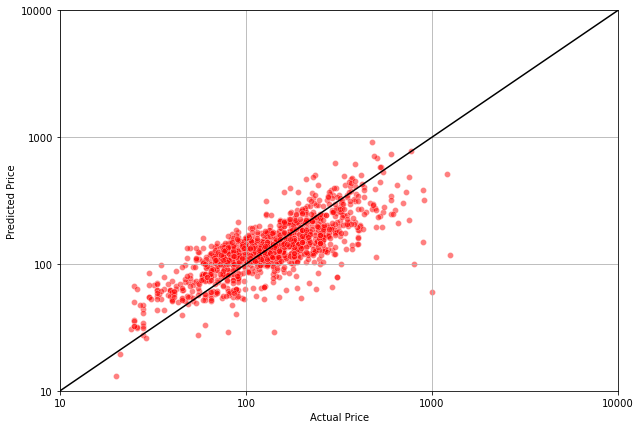

In [84]:
# plotting the results
# comparing price predictions with the test values
x_values = scaler_target.inverse_transform(y_test)
y_values = scaler_target.inverse_transform(predictions)
min_value = 1 # log10(10)
max_value = 5 # log10(10000)+1

fig, ax = plt.subplots(figsize=(10, 7))

plt.plot([min_value,max_value],[min_value,max_value], color='black')
sns.scatterplot(x=x_values[:,0], y=y_values[:,0], alpha=0.5, color='red')
ax.set(xlabel='Actual Price', ylabel='Predicted Price', xlim=(1,4), ylim=(1,4));
xy_range=np.arange(min_value, max_value, step=1)
ax.set_xticks(xy_range)
ax.set_xticklabels(10**xy_range)
ax.set_yticks(xy_range)
ax.set_yticklabels(10**xy_range)
ax.grid(True)

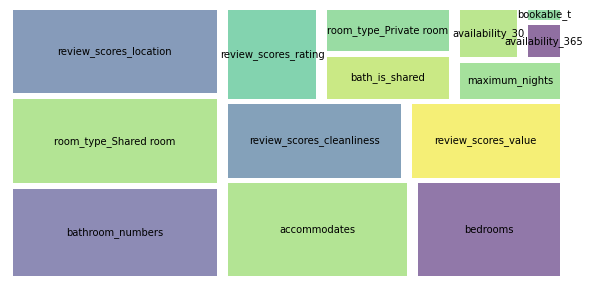

In [85]:
plt.figure(figsize=(10,5))

squarify_labels = [x for x in results_df[results_df.p_value<=0.05].index]
squarify_sizes = list(abs(results_df['coef'][squarify_labels]))

squarify.plot(sizes=squarify_sizes, label=squarify_labels, alpha=0.6, pad=True)
plt.axis('off');

# Evaluation
<br> using sklearn metrics
<br> calculating r2_score, Mean Absolute Error, Mean Square Error, and Root Mean Square Error

In [86]:
print('Test data')
print('r2_score:', metrics.r2_score(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('\n')
print('Training data')
print('r2_score:', metrics.r2_score(y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Test data
r2_score: 0.5854146012879027
RMSE: 0.06882831526474749


Training data
r2_score: 0.6141276211595156
RMSE: 0.06984626583011604
